In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Step 1: Business Understanding

Questions to Answer
1. What is the distribution of rental type in Seattle?
2. Which are the most expensive and cheapest neighbourhoods in Seattle?
3. What time of the year is the busiest and most expensive in Seattle?
4. Is there any correlation between the number of listings and the average price of the listings in a particular area?
5. Is there any relation between the number of reviews and the availability of the listings?

## Step 2: Data Understanding

In [6]:
#Initalizaing dfs
calendar_df = pd.read_csv("data/calendar.csv")
reviews_df = pd.read_csv("data/reviews.csv")
listings_df = pd.read_csv("data/listings.csv")

### Exploring calendar_df

In [7]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,356608,2020-12-23,f,$196.00,$196.00,3,1125
1,356608,2020-12-24,f,$196.00,$196.00,3,1125
2,356608,2020-12-25,f,$196.00,$196.00,3,1125
3,356608,2020-12-26,f,$196.00,$196.00,3,1125
4,356608,2020-12-27,f,$196.00,$196.00,3,1125


In [8]:
calendar_df.dtypes

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

In [9]:
calendar_df.shape

(1499055, 7)

In [10]:
calendar_df.listing_id.nunique()

4107

In [11]:
(calendar_df.price != calendar_df.adjusted_price).sum()/calendar_df.shape[0]*100

2.127673767807052

In [12]:
calendar_df.minimum_nights.value_counts().head()

30    479875
2     355018
1     274436
3     194099
5      30921
Name: minimum_nights, dtype: int64

In [13]:
calendar_df.maximum_nights.value_counts().head()

1125    1005131
365      164364
30        43362
90        31918
28        26550
Name: maximum_nights, dtype: int64

Changes needed to calendar_df:
1. Change date column dtype to datetime
2. Change available column dtype to boolean
3. Remove price column
4. For this analysis, removing minimum_nights and maximum_nights due to inconsistent data

### Exploring listings_df

In [14]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,148,2019-12-27,1.17,7,268
1,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,28,41,2020-11-26,0.38,2,353
2,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,2,54,2020-11-14,0.50,2,232
3,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65479,-122.33652,Entire home/apt,100,4,97,2020-09-28,0.84,2,65
4,9909,Luna Lower - West Seattle,33360,Laura,West Seattle,Fairmount Park,47.56612,-122.37273,Entire home/apt,66,30,75,2020-12-08,0.55,6,364


In [15]:
listings_df.shape

(4107, 16)

In [16]:
listings_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [17]:
listings_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.107000e+03,4.107000e+03,4107.000000,4107.000000,4107.000000,4107.000000,4107.000000,3409.000000,4107.000000,4107.000000
mean,2.650151e+07,8.531630e+07,47.625096,-122.334783,131.661553,14.534697,63.138057,1.973247,20.409301,186.442172
std,1.466462e+07,1.047368e+08,0.046770,0.033152,119.514389,20.177378,90.731410,1.796876,46.175081,129.247437
min,9.419000e+03,2.536000e+03,47.491990,-122.418760,15.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.423016e+07,8.534462e+06,47.606510,-122.356650,76.000000,2.000000,2.000000,0.550000,1.000000,76.000000
50%,2.667028e+07,3.945676e+07,47.620220,-122.335630,100.000000,3.000000,25.000000,1.470000,2.000000,173.000000
75%,4.037570e+07,1.216884e+08,47.660815,-122.311960,145.000000,30.000000,88.000000,2.920000,7.000000,327.000000
max,4.720212e+07,3.771297e+08,47.733750,-122.235590,3638.000000,365.000000,935.000000,12.550000,196.000000,365.000000


In [18]:
listings_df.neighbourhood_group.value_counts()/len(listings_df)*100

Downtown               17.920623
Other neighborhoods    17.433650
Capitol Hill            9.885561
Central Area            7.937667
Queen Anne              6.866326
West Seattle            6.379352
Ballard                 5.868030
Rainier Valley          5.259313
Cascade                 4.285366
Beacon Hill             3.676650
Delridge                3.189676
University District     2.994887
Northgate               2.727051
Magnolia                1.972243
Lake City               1.680058
Seward Park             1.022644
Interbay                0.900901
Name: neighbourhood_group, dtype: float64

In [19]:
listings_df.room_type.value_counts()

Entire home/apt    3344
Private room        714
Shared room          34
Hotel room           15
Name: room_type, dtype: int64

In [20]:
listings_df.reviews_per_month.isna().sum()

698

Changes needed to calendar_df:
1. Remove reviews_per_month, latitude, longitude columns, minimum_nights, name and host_name
2. Change column names for id, price

### Exploring reviews_df

In [21]:
reviews_df

,listing_id,date
0,9419,2010-07-30
1,9419,2010-08-23
2,9419,2010-08-30
3,9419,2010-09-06
4,9419,2010-10-31
...,...,...
259303,46748851,2020-12-14
259304,46798760,2020-12-16
259305,46876422,2020-12-16
259306,46905015,2020-12-15


No valuable data from reviews_df so going to ignore this df

## Step 3: Data Preparation

In [22]:
def calendar_clean(df):
    """
    Cleans the calendar df in the following ways:
    1. Drop columns minimum_nights and maximum_nights due to bad data
    2. Removes price column and keep adjusted_price
    3. Converts date column to datetime format and adjusted_price column to float
    4. Changes t to True and f to False
    """
    df_clean = df.copy()
    df_clean.drop(columns = ["price", "minimum_nights", "maximum_nights"], inplace = True)
    df_clean.date = df_clean.date.astype('datetime64[ns]')
    df_clean.adjusted_price = df_clean.adjusted_price.replace('[\$,]', '', regex=True).astype(float)
    df_clean['available'] = df_clean['available'].replace({'t': True, 'f': False})
    return df_clean

In [23]:
calendar_clean = calendar_clean(calendar_df)

In [24]:
calendar_clean.date.min()

Timestamp('2020-12-23 00:00:00')

In [25]:
calendar_clean.date.max()

Timestamp('2021-12-29 00:00:00')

In [26]:
def listings_clean(df):
    """
    Cleans the calendar df in the following ways:
    1. Remove reviews_per_month, latitude, longitude and minimum_nights columns
    2. Change column names for id, price
    """
    df_clean = df.copy()
    df_clean.drop(columns = ["reviews_per_month", "minimum_nights", "latitude", "longitude", "name", "host_name"], 
                  inplace = True)
    df_clean.rename(columns = {"id" : "listing_id", "price" : "adjusted_price"}, inplace = True)
    return df_clean

In [27]:
listings_clean = listings_clean(listings_df)

## Step 4: Data Analysis

1. What's the distribution of room_type in Seattle?

In [28]:
listings_clean.room_type.value_counts()

Entire home/apt    3344
Private room        714
Shared room          34
Hotel room           15
Name: room_type, dtype: int64

In [29]:
listings_clean.room_type.value_counts(normalize = True)

Entire home/apt    0.814220
Private room       0.173850
Shared room        0.008279
Hotel room         0.003652
Name: room_type, dtype: float64

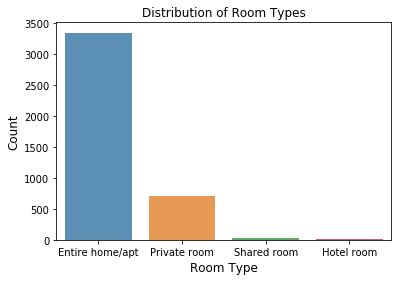

In [30]:
sns.barplot(listings_clean.room_type.value_counts().index, listings_clean.room_type.value_counts().values, alpha=0.8)
plt.title('Distribution of Room Types')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Room Type', fontsize=12)
plt.show()

2. What is the most expensive and the cheapest neighbourhood in Seattle?

In [77]:
neighborhood_price = listings_clean.groupby("neighbourhood_group")["adjusted_price"].mean().sort_values(ascending = False)

In [78]:
neighborhood_price

neighbourhood_group
Magnolia               185.950617
Queen Anne             175.918440
Central Area           149.407975
Lake City              149.188406
Ballard                143.908714
West Seattle           137.194656
Cascade                136.045455
Capitol Hill           130.802956
Downtown               129.599185
Other neighborhoods    123.775140
Seward Park            121.047619
Rainier Valley         120.657407
University District    107.073171
Beacon Hill            102.185430
Delridge                95.603053
Northgate               88.982143
Interbay                84.891892
Name: adjusted_price, dtype: float64

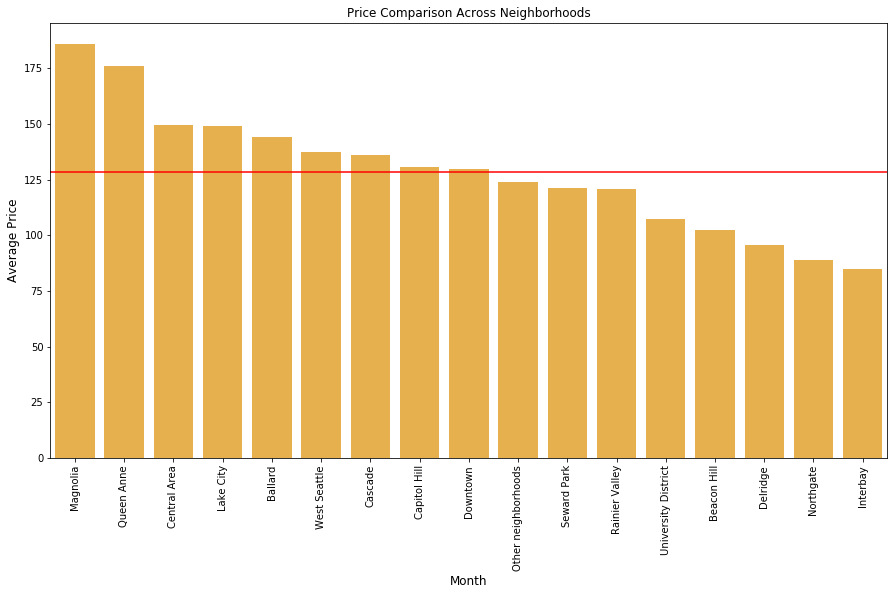

In [88]:
plt.figure(figsize = (15,8))
sns.barplot(neighborhood_price.index, neighborhood_price.values, alpha=0.8, color = "orange")
plt.xticks(rotation=90)
plt.axhline(neighborhood_price.values.mean(), color = "r")
plt.title('Price Comparison Across Neighborhoods')
plt.ylabel('Average Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

3. What time of the year is most expensive in Seattle?

In [47]:
monthly_comparison = calendar_clean.groupby(calendar_clean['date'].dt.strftime('%B'))['adjusted_price'].mean().sort_values(ascending = False)

In [49]:
monthly_comparison.head()

date
July         155.986106
August       153.971991
June         153.260523
September    150.662414
November     148.328667
Name: adjusted_price, dtype: float64

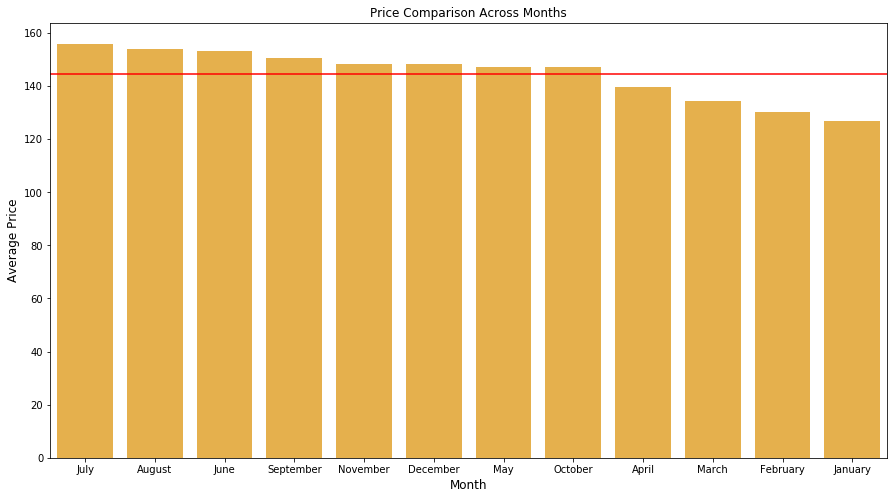

In [60]:
plt.figure(figsize = (15,8))
sns.barplot(monthly_comparison.index, monthly_comparison.values, alpha=0.8, color = "orange")
plt.axhline(monthly_comparison.values.mean(), color = "r")
plt.title('Price Comparison Across Months')
plt.ylabel('Average Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

4. Is there any correlation between the number of listings and the average price of the listings in a particular area?

In [89]:
a = listings_clean.groupby("neighbourhood_group").adjusted_price.agg(["count", "mean"]).corr()

In [91]:
a.rename(columns = {"count": "Number_of_Listings", "mean": "Average_Listing_Price"}, index = {"count": "Number_of_Listings", "mean": "Average_Listing_Price"})

,Number_of_Listings,Average_Listing_Price
Number_of_Listings,1.000000,0.144017
Average_Listing_Price,0.144017,1.000000


5. Is there any relation between the number of reviews and the availability of the listings?

In [238]:
listings_clean.loc[:, ["number_of_reviews", "availability_365"]].corr()

,number_of_reviews,availability_365
number_of_reviews,1.000000,-0.031416
availability_365,-0.031416,1.000000


In [61]:
len(listings_df)

4107

## Step 5: Evaluation

1. Entire home/apt is the most popular type of room listing (3344/81.4%)

2. Magnolia is the most expensive neighbourhood with the average price per night per listing around 186. 
Interbay is the least expensive neighbourhood with the average price per night per listing around 85.

3. There's a slight positive correlation with the number of listings and the average price of the listings in a particular area (0.14)

4. There's a very weak negative correlation between the number of reviews and the availability of a listing throughout the year. I realized it might be wrong to ask this question because there's still 8 months remaining in 2021. We would want to ask this question at the end of the year when we have data on every listing for every day of the year